## Analysis of google reviews

In [250]:
import pandas as pd
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

## import data and drop columns

In [251]:
df = pd.read_csv("../raw_data/reviews_clean_2_12_21.csv")

In [252]:
df.drop(columns=["index","Unnamed: 0", "comment_names"], inplace=True)
df.shape

(81881, 4)

In [253]:
df.drop_duplicates(inplace=True)

df.head()

,restaurant_name,comment_ratings,comment_dates,comment_comments
0,Augusto Lisboa,Rated 5.0 out of 5.,2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,Rated 5.0 out of 5.,5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,Rated 5.0 out of 5.,6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,Rated 5.0 out of 5.,2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,Rated 4.0 out of 5.,a week ago,Love the avocado toast! Best cappuccino and th...


In [254]:
df.shape

(81881, 4)

In [255]:
cleaned_df = df.dropna()
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df.shape

(81536, 4)

### Clean score column

In [256]:
cleaned_df.comment_ratings.unique()

array(['Rated 5.0 out of 5.', 'Rated 4.0 out of 5.',
       'Rated 1.0 out of 5.', 'Rated 3.0 out of 5.',
       'Rated 2.0 out of 5.'], dtype=object)

In [257]:
def extract_score(series):
    return float(series[6:9])

In [258]:
cleaned_df['comment_ratings'] = cleaned_df['comment_ratings'].apply(extract_score)

In [259]:
cleaned_df.comment_ratings.unique()

array([5., 4., 1., 3., 2.])

In [260]:
cleaned_df.dtypes

restaurant_name      object
comment_ratings     float64
comment_dates        object
comment_comments     object
dtype: object

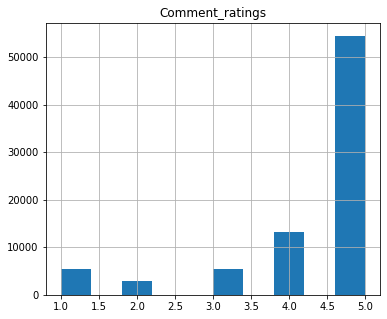

In [261]:
plt.figure(figsize=(6,5))
plt.title("Comment_ratings")
plt.grid()
plt.hist(cleaned_df.comment_ratings);

### Clean comment dates column

In [262]:
cleaned_df.comment_dates.unique()

array(['2 weeks ago', '5 days ago', '6 days ago', 'a week ago',
       '3 weeks ago', '2 months ago', 'a month ago', '2 days ago',
       '3 months ago', '5 months ago', '3 days ago', '6 months ago',
       '4 months ago', 'a year ago', '4 days ago', '2 years ago',
       '11 months ago', '4 years ago', '10 months ago', '7 months ago',
       '8 months ago', '4 weeks ago', '3 years ago', '5 years ago',
       '9 years ago', '8 years ago', 'a day ago', '6 years ago',
       '9 months ago', '10 years ago', '15 hours ago', '35 minutes ago',
       '14 hours ago', '7 years ago', '11 years ago', '16 hours ago',
       '23 hours ago', '4 hours ago', '3 hours ago', '17 hours ago',
       '19 hours ago', '22 hours ago', '11 hours ago', '6 hours ago',
       '46 minutes ago', '2 hours ago', '7 hours ago', '5 hours ago',
       '18 hours ago', 'há 9 anos', '13 minutes ago', '20 hours ago',
       'há 23 horas', 'há 19 horas'], dtype=object)

In [263]:
cleaned_df.comment_dates

0         2 weeks ago
1          5 days ago
2          6 days ago
3         2 weeks ago
4          a week ago
             ...     
81531     2 years ago
81532     2 years ago
81533      a year ago
81534    6 months ago
81535      a year ago
Name: comment_dates, Length: 81536, dtype: object

In [264]:
def clean_comment_dates(text):
    text = text.replace("há","")
    text = text.replace("ago","")
    text = text.replace("ago","")
    text = text.replace("ago","")
    text = text.replace("s","")
    text = text.replace(" day","*1")
    text = text.replace(" week","*7")
    text = text.replace(" month","*30")
    text = text.replace(" year","*365")
    text = text.replace(" ano","*365")
    if "minute" in text or  "hour" in text or "hora" in text:
        text = "1"
    if "a" in text:
        text = text.replace("a", "1")
    return eval(text)

In [265]:
cleaned_df.comment_dates = cleaned_df.comment_dates.apply(clean_comment_dates)

In [276]:
cleaned_df.head()

,restaurant_name,comment_ratings,when_written_days_ago,comment_comments
0,Augusto Lisboa,5.0,14,Well worth the small wait to get in of around ...
1,Augusto Lisboa,5.0,5,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,5.0,6,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,5.0,14,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,4.0,7,Love the avocado toast! Best cappuccino and th...


In [267]:
cleaned_df.rename(columns={'comment_dates':'when_written_days_ago'}, inplace=True)

## Translation TBD

In [271]:
# def translate(df):
#     for i in df.comment_comments:
#         translator = google_translator()
#         i = translator.translate(i, lang_src = "auto", lang_tgt = "en")
#         df['translated_comment'] = i

In [287]:
# def translate_language(text):
#     if str(text.find("pelo ")).isdigit() == True: # note using pelo is not catching all the words, ideally we need to detect language then translate
#         # translated = GoogleTranslator(source='auto', target='en').translate(text) 
#         # print(translated)
#         return text
#     else:
#         return 0

NameError: name 'LimeTextExplainer' is not defined

In [ ]:
# cleaned_df = translate(cleaned_df)

In [288]:
# cleaned_df['translated_'] = cleaned_df.comment_comments.apply(translate_language)

### Clean Reviews

In [304]:
cleaned_df.comment_comments.tail()

81531    (Traduzido pelo Google) O restaurante parece b...
81532    (Traduzido pelo Google) Veio para bebidas e so...
81533    Jantar incrível, serviço super atencioso e cla...
81534    (Traduzido pelo Google) Bom lugar amigável\n\n...
81535    Preço um pouco alto, mas atendimento excepcion...
Name: comment_comments, dtype: object

In [305]:
def remove_google_trans_comment(series):
    if "(Translated by Google)" in series:
        return series.replace("(Translated by Google) ","")
    else:
        return series    

In [306]:
def remove_original_translation(series):
    if "\n\n(Original)" in series:
        index = series.find("\n\n(Original)")
        return series[:index]
    else:
        return series    

In [307]:
cleaned_df.comment_comments = cleaned_df.comment_comments.apply(remove_google_trans_comment)

In [308]:
cleaned_df.comment_comments = cleaned_df.comment_comments.apply(remove_original_translation)

In [309]:
cleaned_df.comment_comments.tail()

81531    (Traduzido pelo Google) O restaurante parece b...
81532    (Traduzido pelo Google) Veio para bebidas e so...
81533    Jantar incrível, serviço super atencioso e cla...
81534           (Traduzido pelo Google) Bom lugar amigável
81535    Preço um pouco alto, mas atendimento excepcion...
Name: comment_comments, dtype: object

In [310]:
cleaned_df.shape

(81536, 5)

## DataFrame Selection

### Importing restaurants

In [311]:
df_restaurants = pd.read_csv("../raw_data/Clean_data_1_12_v2.csv")

In [312]:
df_restaurants.head()

,Unnamed: 0,name,type,description,rating,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-491,Lisboa,Graça
1,1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,4.9,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-637,Lisboa,Prazeres
2,2,Crisfama,restaurant,NaN,4.8,649.0,1.0,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-188,Lisboa,Santa Engrácia
3,3,Alma,fine dining,High-end restaurant with avant-garde local mea...,4.8,953.0,4.0,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",1,1,0,0,1,0,1200-224,Lisboa,São Paulo
4,4,Restaurant CHULHO & Bar,restaurant,NaN,4.9,180.0,NaN,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-850,Lisboa,Lapa


In [313]:
df_restaurants.drop(columns=["Unnamed: 0", "rating"], inplace=True)

In [314]:
df_restaurants.rename(columns={'name':'restaurant_name', 'type':'restaurant_type'}, inplace=True)

In [315]:
df_restaurants.head()

,restaurant_name,restaurant_type,description,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-491,Lisboa,Graça
1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-637,Lisboa,Prazeres
2,Crisfama,restaurant,NaN,649.0,1.0,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",1,1,0,0,1,0,1100-188,Lisboa,Santa Engrácia
3,Alma,fine dining,High-end restaurant with avant-garde local mea...,953.0,4.0,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",1,1,0,0,1,0,1200-224,Lisboa,São Paulo
4,Restaurant CHULHO & Bar,restaurant,NaN,180.0,NaN,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",1,1,1,0,0,0,1200-850,Lisboa,Lapa


In [316]:
df_restaurants.shape

(585, 16)

In [317]:
df_restaurants.price.isna().sum()

233

### Merging dfs

In [318]:
merged_df = cleaned_df.merge(df_restaurants, on="restaurant_name", how="left")
merged_df.head(1)

,restaurant_name,comment_ratings,when_written_days_ago,comment_comments,translated_,restaurant_type,description,review_count,price,address,label,dine_in,takeaway,delivery,drive_through,no_del_exp,curb_pickup,postal_code,municipality,neighborhood
0,Augusto Lisboa,5.0,14,Well worth the small wait to get in of around ...,0,brunch,"Hip brunch eatery serving savory toasts, banan...",1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",1.0,1.0,0.0,0.0,1.0,0.0,1100-491,Lisboa,Graça


In [319]:
merged_df.shape

(81536, 20)

In [320]:
merged_df.dtypes

restaurant_name           object
comment_ratings          float64
when_written_days_ago      int64
comment_comments          object
translated_               object
restaurant_type           object
description               object
review_count             float64
price                    float64
address                   object
label                     object
dine_in                  float64
takeaway                 float64
delivery                 float64
drive_through            float64
no_del_exp               float64
curb_pickup              float64
postal_code               object
municipality              object
neighborhood              object
dtype: object

## filtering merged dataset

In [ ]:
restaurant_type = 'brunch '
price = 2.0
neighborhood = 'Graça'
min_rating = 0.0
max_rating = 3.0

In [ ]:
filtered_df = merged_df
#filtered_df = filtered_df[filtered_df['restaurant_type'] == restaurant_type]
# filtered_df = filtered_df[filtered_df['price'] == price]
# filtered_df = filtered_df[filtered_df['neighborhood'] == neighborhood]
filtered_df = filtered_df[filtered_df['comment_ratings'] >= min_rating]
filtered_df = filtered_df[filtered_df['comment_ratings'] <= max_rating]

# filtered_df = filtered_df[filtered_df['dine_in'] == 1]
# filtered_df = filtered_df[filtered_df['takeaway'] == 1]
# filtered_df = filtered_df[filtered_df['delivery'] == 1]
# filtered_df = filtered_df[filtered_df['drive_through'] == 1]
# filtered_df = filtered_df[filtered_df['no_del_exp'] == 1]
# filtered_df = filtered_df[filtered_df['curb_pickup'] == 1]

In [ ]:
filtered_df.head()